
# Topic: Process Monitoring via PCA using PDS_PCA module

#### For illustration, We will use data from a polymer manufacturing facility. The dataset contains 33 variables and 92 hourly samples. Full details on the dataset is available in our book 'Machine Learning for Process Systems Engineering' (https://leanpub.com/machineLearningPSE)

#### For this dataset, it is reported that the process started behaving abnormally around sample 70 and eventually had to be shut down. Therefore, we use samples 1 to 69 for training the PCA model. The rest of the data will be utilized for process monitoring illustration. 

#### Our objective here is to build a fault detection and diagnosis tool that clearly indicates the presence of process fault and highlights the faulty variables. 


In [1]:
# import required packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from PDStoolkit import PDS_PCA

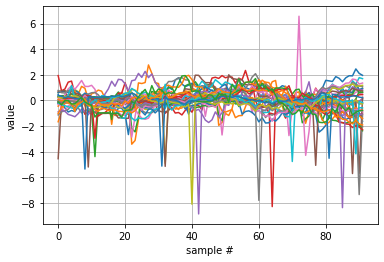

In [6]:
# fetch data
data = pd.read_excel('proc1a.xlsx', skiprows = 1,usecols = 'C:AI')

# visualize complete data
plt.figure()
plt.plot(data)
plt.grid()
plt.ylabel('value')
plt.xlabel('sample #')
plt.show()

In [ ]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                          Train the monitoring model
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [8]:
# separate training data and scale
data_train = data.iloc[0:69,]
scaler = StandardScaler()
data_train_normal = scaler.fit_transform(data_train)

# of latents selected:  13


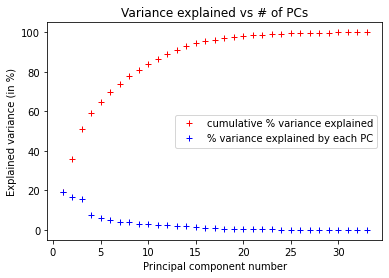

PDS_PCA(n_components=13)

In [9]:
# build PDS_PCA model
pca = PDS_PCA()
pca.fit(data_train_normal, autoFindNLatents=True)

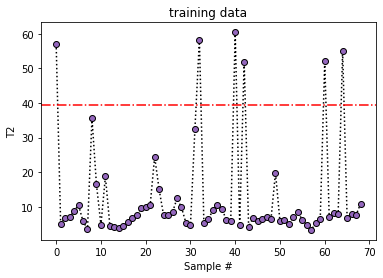

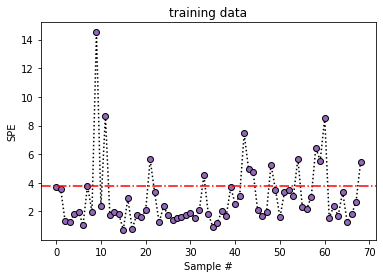

In [11]:
# use methods of the fitted PDS_PLS object to compute monitoring metrics, their thresholds, and plot monitoring charts
T2_train, SPE_train = pca.computeMetrics(data_train_normal, isTrainingData=True)
T2_CL, SPE_CL = pca.computeThresholds(method='statistical', alpha=0.01)
pca.draw_monitoring_charts(title='training data')

# the above three lines fo code could equivalently be replaced with the following
# pca.fit_4_monitoring(data_train_normal, autoFindNLatents=True, method='statistical', alpha=0.01)

In [21]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##       Fault detection on test data using the trained monitoring model
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [12]:
#  get test data
data_test = data.iloc[69:,]
data_test_normal = scaler.transform(data_test) # using scaling parameters from training data

Number of abnormal sample(s):  22


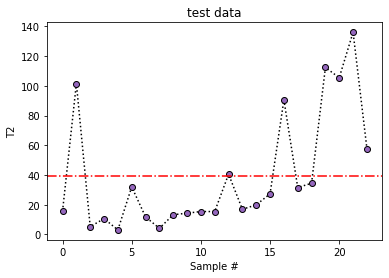

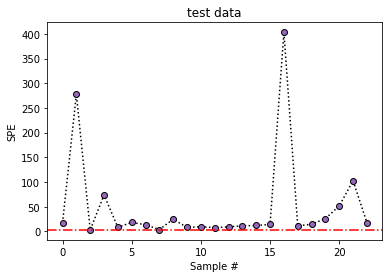

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [13]:
# check abnormalities
pca.detect_abnormalities(data_test_normal, title='test data') # an array of bool values is returned with value of True for abnormal samples and False for normal samples

In [14]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##       Fault diagnosis using the trained monitoring model
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

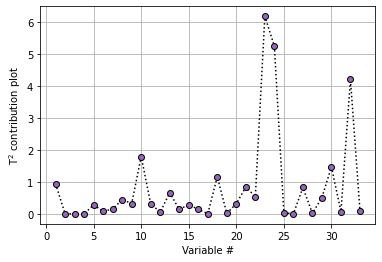

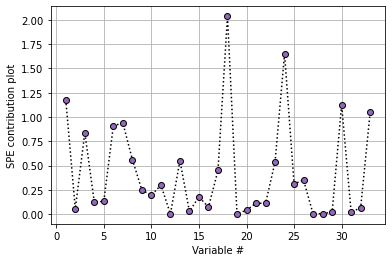

In [17]:
# get fault contributions for the 16th test sample
T2_contri, SPE_contri = pca.get_contributions(data_test_normal[15,:]) 

#### Variable # 24 seem to make large contributions to both the indexes and in Figure below we can see that there was a sharp decline in its value towards the onset of process fault in the dataset. A plant operator can use his/her judgement to further troubleshoot the abnormality to isolate the root-cause.

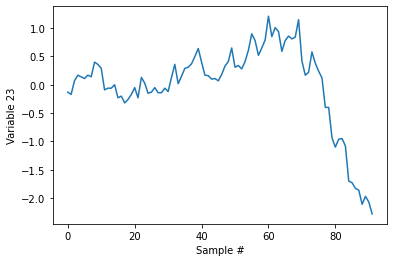

In [18]:
plt.figure()
plt.plot(data.iloc[:,23])
plt.xlabel('Sample #')
plt.ylabel('Variable 23')
plt.show()